# Project 1: Sales Forecasting with Linear Regression

## Problem Statement
Businesses struggle to estimate future sales based on past performance.

## Objective
Build a regression model to predict future sales using historical data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## Dataset
Superstore sales dataset with fields: Order Date, Product Name, Quantity, and Sales.

In [7]:
df = pd.read_csv("C:/Users/Asus/Downloads/RISE/Sample - Superstore.csv",encoding='ISO-8859-1')

In [9]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [11]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())

(9994, 21)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 


In [13]:
df = df[['Order Date', 'Product Name', 'Quantity', 'Sales']].copy()
df['Order Date'] = pd.to_datetime(df['Order Date'])

## Methadology
- Preprocessed the data
- Selected one product for individual forecasting
- Grouped sales by order date
- Used linear regression on 'Days Since Start' to model sales trend

In [16]:
product_sales = df.groupby(['Order Date', 'Product Name']).agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()
product_name = "Canon imageCLASS 2200 Advanced Copier"
product_df = product_sales[product_sales['Product Name'] == product_name].copy()
product_df = product_df.sort_values('Order Date')
product_df['Days Since Start'] = (product_df['Order Date'] - product_df['Order Date'].min()).dt.days

In [18]:
X = product_df[['Days Since Start']]
y = product_df['Sales']
model = LinearRegression()
model.fit(X, y)
product_df['Predicted Sales'] = model.predict(X)

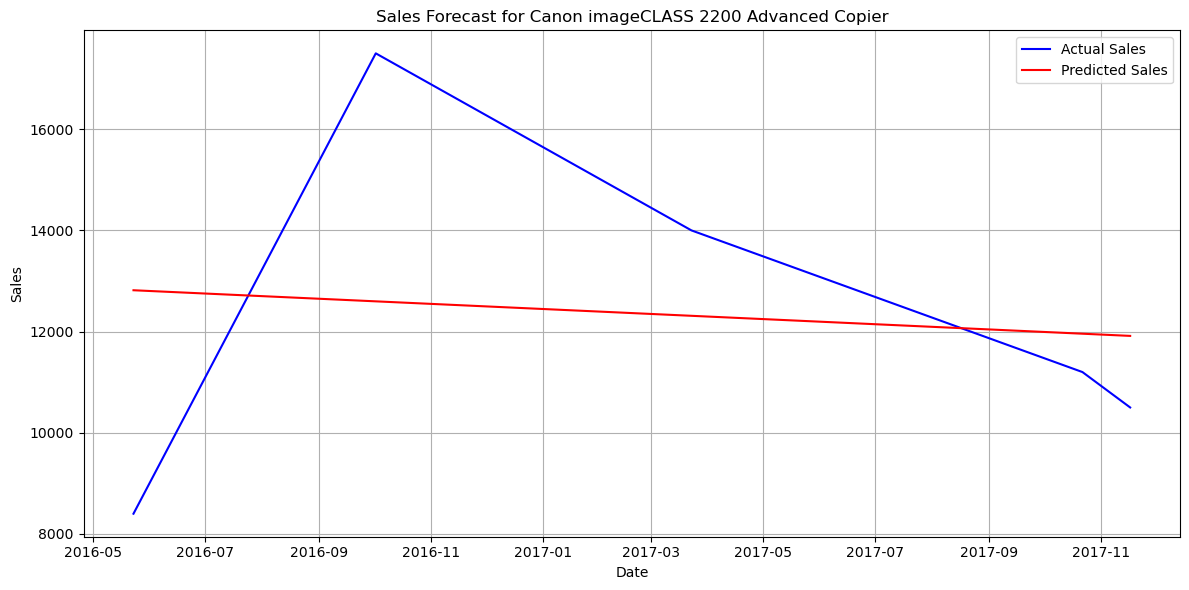

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(product_df['Order Date'], product_df['Sales'], label='Actual Sales', color='blue')
plt.plot(product_df['Order Date'], product_df['Predicted Sales'], label='Predicted Sales', color='red')
plt.title(f'Sales Forecast for {product_name}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
last_day = product_df['Days Since Start'].max()
future_days = pd.DataFrame(np.arange(last_day + 1, last_day + 31), columns=['Days Since Start'])
future_sales = model.predict(future_days)
future_dates = pd.date_range(start=product_df['Order Date'].max() + pd.Timedelta(days=1), periods=30)

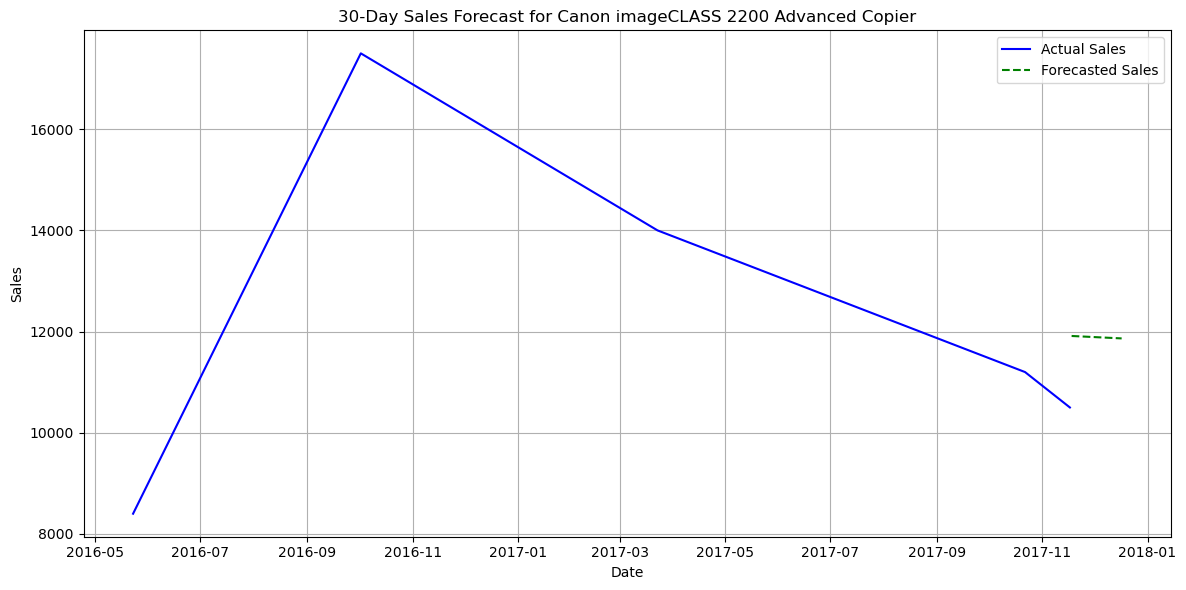

In [24]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Sales': future_sales})

plt.figure(figsize=(12, 6))
plt.plot(product_df['Order Date'], product_df['Sales'], label='Actual Sales', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Sales'], label='Forecasted Sales', color='green', linestyle='--')
plt.title(f'30-Day Sales Forecast for {product_name}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion
The linear regression model captured the sales pattern of the selected product. The predicted future values give a rough forecast of upcoming sales trends, which can be helpful for business decision-making such as inventory planning or marketing focus.